In [397]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

In [398]:
months_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
days_dict = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [399]:
# one-hotencoded file 
data = pd.read_csv("../data/all_with_onehot_new+coupons.csv")
 # did not drop, just reset
label_encoder = LabelEncoder()

months = []
for i in range(len(data)):
  # X['Date'][i] = X['Date'][i][5:7]
  month = months_dict[int(data['Date'][i][5:7])]
  months.append(month)

for i in range(len(data)):
  # X['Date'][i] = X['Date'][i][5:7]
  w  = days_dict[data['Weekday'][i]]  
  data['Weekday'][i] = w

data['Month'] = pd.Series(months)
# data = data[data['SemType'] != 'Vacation']

data = data.dropna()
data = pd.get_dummies(data, columns=['MealType', 'SemType','Month', 'Weekday'])

data.head()
data = data.reset_index()
# data.info()

# data['MealType_encoded'] = label_encoder.fit_transform(data['MealType'])
# data['SemType_encoded'] = label_encoder.fit_transform(data['SemType'])

X = data
X = X.drop(['Paytm+Cash', 'Coupons', 'Date', 'index'], axis=1)
# # X = data[['Weekday','MealType_encoded','SemType_encoded','Holiday','CouponsMand', 'Month']]
y1 = data['Paytm+Cash']
y2 = data['Coupons']

/var/folders/4d/w8t5vd_11zs7s9jlct5ksrfr0000gn/T/ipykernel_26216/1960628926.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weekday'][i] = w


In [400]:
X.head(50)

,Holiday,CouponsMand,Ajwain Parantha,Aloo Sabzi,Dal Makhni,Mix Veg,Samosa,Mix Dal,Soyabean Matar,Jalebi,...,Month_November,Month_October,Month_September,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
6,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
7,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
8,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,1,0,0,0,0,0
9,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [401]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Columns: 122 entries, Holiday to Weekday_Wednesday
dtypes: float64(96), int64(1), uint8(25)
memory usage: 1.0 MB


In [402]:
# Creating a neural network with tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [403]:
# preprocessing
for col in X.columns:
    X[col] = X[col].astype('float64')
    X[col] = X[col]/X[col].max()

X.head()

,Holiday,CouponsMand,Ajwain Parantha,Aloo Sabzi,Dal Makhni,Mix Veg,Samosa,Mix Dal,Soyabean Matar,Jalebi,...,Month_November,Month_October,Month_September,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.033333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.033333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [404]:
# Paytm+Cash
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.08, random_state=0)


In [405]:
# creating model
model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y1_train,
    epochs=E, validation_split = 0.2, verbose=10
)


Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 1024)              125952    
                                                                 
 dense_149 (Dense)           (None, 512)               524800    
                                                                 
 dense_150 (Dense)           (None, 128)               65664     
                                                                 
 dense_151 (Dense)           (None, 1)                 129       
                                                                 
Total params: 716,545
Trainable params: 716,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

4/4 [==============================] - 0s 950us/step


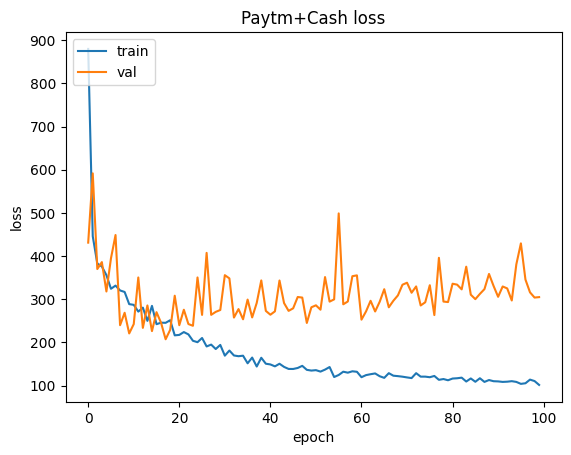

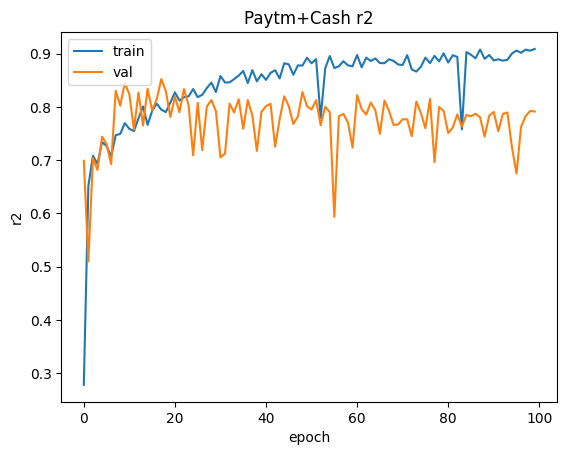

Test RMSE:  15.760058138929777
Train RMSE:  10.083243839928162
Test R2:  0.7604060016134325
Train R2:  0.9088085293769836


In [406]:
# testing
y1_pred = model.predict(X_test)
y1_pred = y1_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Paytm+Cash loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Paytm+Cash r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2 = r2_score(y1_test, y1_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))
print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])


In [407]:
# Coupons
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.08, random_state=0)

# creating the model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y2_train,
    epochs=E, validation_split = 0.2, verbose=10
)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 1024)              125952    
                                                                 
 dense_153 (Dense)           (None, 512)               524800    
                                                                 
 dense_154 (Dense)           (None, 128)               65664     
                                                                 
 dense_155 (Dense)           (None, 1)                 129       
                                                                 
Total params: 716,545
Trainable params: 716,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

4/4 [==============================] - 0s 1ms/step


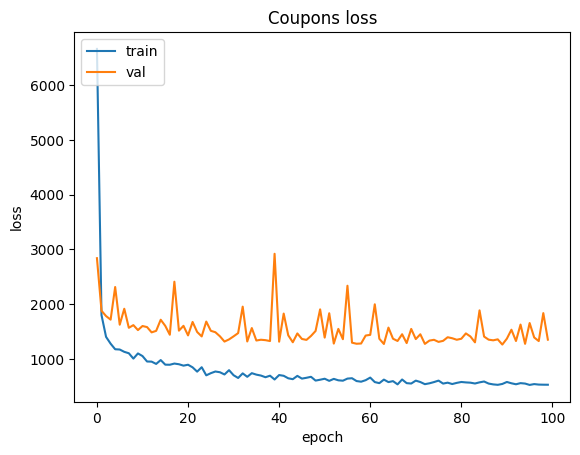

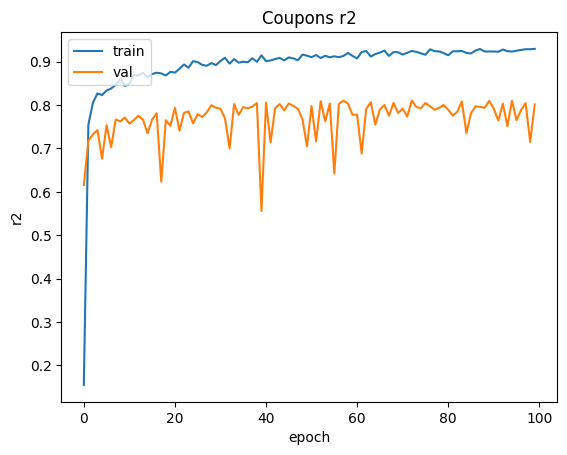

Test RMSE:  39.518718736934666
Train RMSE:  22.940063665911953
Test R2:  0.7757186714449763
Train R2:  0.9296677112579346


In [408]:
y2_pred = model.predict(X_test)
y2_pred = y2_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Coupons loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Coupons r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2 = r2_score(y2_test, y2_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))

print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])

In [409]:
# Paytm+Cash and Coupons
y3 = y1.values + y2.values
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.08, random_state=0)

# creating the model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y3_train,
    epochs=E, validation_split = 0.2, verbose=10
)

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 1024)              125952    
                                                                 
 dense_157 (Dense)           (None, 512)               524800    
                                                                 
 dense_158 (Dense)           (None, 128)               65664     
                                                                 
 dense_159 (Dense)           (None, 1)                 129       
                                                                 
Total params: 716,545
Trainable params: 716,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

4/4 [==============================] - 1s 9ms/step


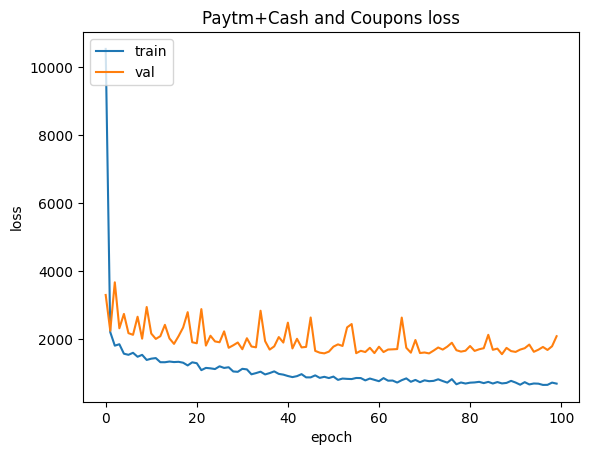

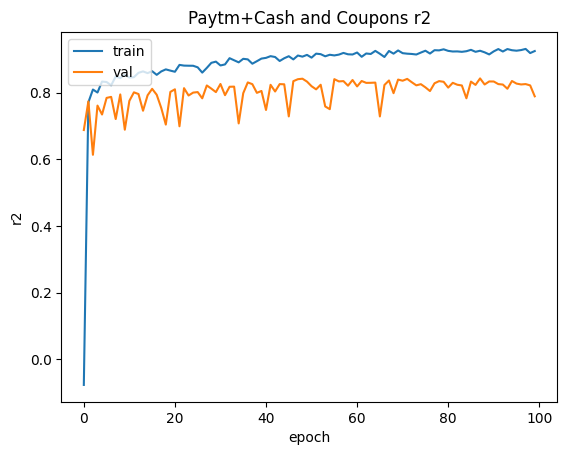

Test RMSE:  45.43594220024109
Train RMSE:  26.20560908954238
Test R2:  0.7487935110568845
Train R2:  0.9251856803894043


In [410]:
y3_pred = model.predict(X_test)
y3_pred = y3_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Paytm+Cash and Coupons loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Paytm+Cash and Coupons r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y3_test, y3_pred))
r2 = r2_score(y3_test, y3_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))

print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])

In [411]:
# Running without coupon counts
# one-hotencoded file 
data = pd.read_csv("../data/all_with_onehot_new.csv")
 # did not drop, just reset
label_encoder = LabelEncoder()

months = []
for i in range(len(data)):
  # X['Date'][i] = X['Date'][i][5:7]
  month = months_dict[int(data['Date'][i][5:7])]
  months.append(month)

for i in range(len(data)):
  # X['Date'][i] = X['Date'][i][5:7]
  w  = days_dict[data['Weekday'][i]]  
  data['Weekday'][i] = w

data['Month'] = pd.Series(months)
# data = data[data['SemType'] != 'Vacation']

data = data.dropna()
data = pd.get_dummies(data, columns=['MealType', 'SemType','Month', 'Weekday'])

data.head()
data = data.reset_index()
# data.info()

# data['MealType_encoded'] = label_encoder.fit_transform(data['MealType'])
# data['SemType_encoded'] = label_encoder.fit_transform(data['SemType'])

X = data
X = X.drop(['Paytm+Cash', 'Coupons', 'Date', 'index'], axis=1)
# X = data[['Weekday','MealType_encoded','SemType_encoded','Holiday','CouponsMand', 'Month']]
y1 = data['Paytm+Cash']
y2 = data['Coupons']

/var/folders/4d/w8t5vd_11zs7s9jlct5ksrfr0000gn/T/ipykernel_26216/2092426045.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weekday'][i] = w


In [412]:
print(X.head())
print(X.info())

   Holiday  CouponsMand  Ajwain Parantha  Aloo Sabzi  Dal Makhni  Mix Veg  \
0        0          0.0              0.0         0.0         0.0      0.0   
1        0          0.0              0.0         0.0         0.0      0.0   
2        0          0.0              0.0         0.0         0.0      0.0   
3        0          0.0              0.0         0.0         0.0      0.0   
4        0          0.0              0.0         0.0         0.0      0.0   

   Samosa  Mix Dal  Soyabean Matar  Jalebi  ...  Month_November  \
0     0.0      0.0             0.0     0.0  ...               0   
1     0.0      0.0             0.0     0.0  ...               0   
2     0.0      0.0             0.0     0.0  ...               0   
3     0.0      0.0             0.0     0.0  ...               0   
4     0.0      0.0             0.0     0.0  ...               0   

   Month_October  Month_September  Weekday_Friday  Weekday_Monday  \
0              0                1               0               0

In [413]:
# preprocessing
for col in X.columns:
    X[col] = X[col].astype('float64')
    X[col] = X[col]/X[col].max()

X.head()

,Holiday,CouponsMand,Ajwain Parantha,Aloo Sabzi,Dal Makhni,Mix Veg,Samosa,Mix Dal,Soyabean Matar,Jalebi,...,Month_November,Month_October,Month_September,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 1024)              121856    
                                                                 
 dense_161 (Dense)           (None, 512)               524800    
                                                                 
 dense_162 (Dense)           (None, 128)               65664     
                                                                 
 dense_163 (Dense)           (None, 1)                 129       
                                                                 
Total params: 712,449
Trainable params: 712,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

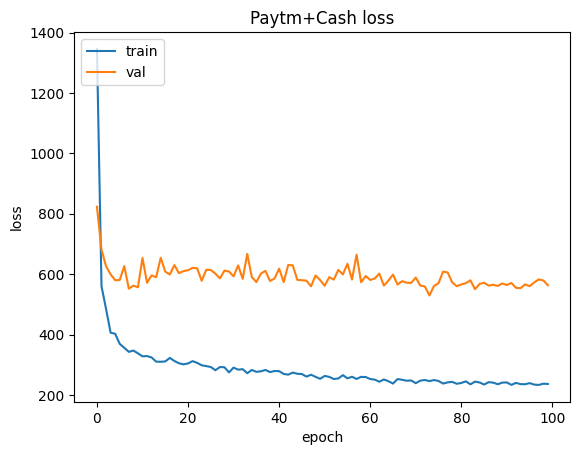

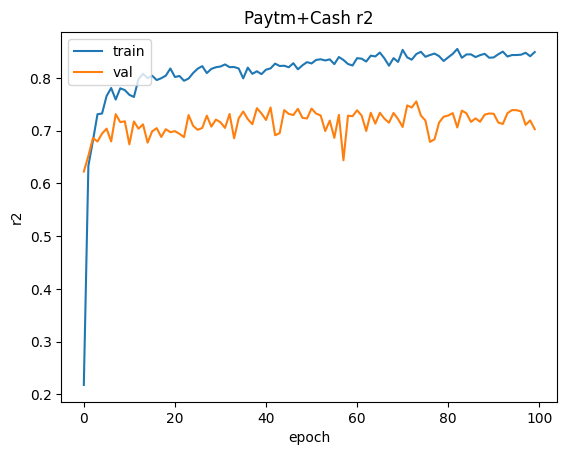

Test RMSE:  20.502461330582236
Train RMSE:  15.376424583868593
Test R2:  0.7218985634794604
Train R2:  0.8491010069847107


In [414]:
# Paytm+Cash
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.08, random_state=0)

# creating model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y1_train,
    epochs=E, validation_split = 0.2, verbose=10
)

y1_pred = model.predict(X_test)
y1_pred = y1_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Paytm+Cash loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Paytm+Cash r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2 = r2_score(y1_test, y1_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))
print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 1024)              121856    
                                                                 
 dense_165 (Dense)           (None, 512)               524800    
                                                                 
 dense_166 (Dense)           (None, 128)               65664     
                                                                 
 dense_167 (Dense)           (None, 1)                 129       
                                                                 
Total params: 712,449
Trainable params: 712,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

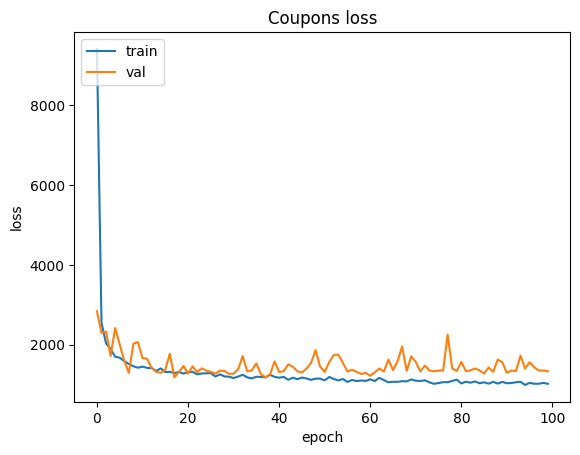

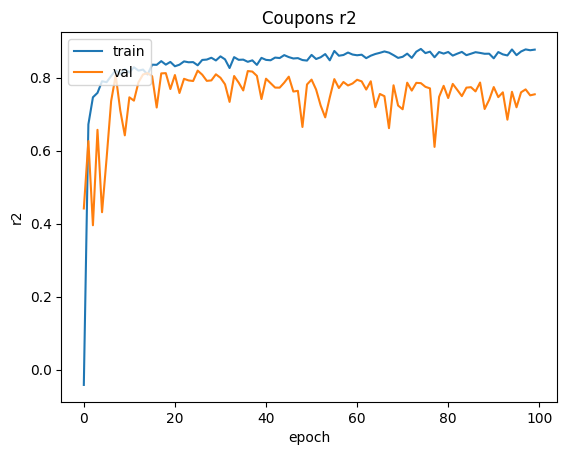

Test RMSE:  37.95446590150087
Train RMSE:  31.972252259588803
Test R2:  0.8400382113440267
Train R2:  0.8766040205955505


In [415]:
# Coupons
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.08, random_state=0)

# creating the model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y2_train,
    epochs=E, validation_split = 0.2, verbose=10
)

y2_pred = model.predict(X_test)
y2_pred = y2_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Coupons loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Coupons r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2 = r2_score(y2_test, y2_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))

print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 1024)              121856    
                                                                 
 dense_169 (Dense)           (None, 512)               524800    
                                                                 
 dense_170 (Dense)           (None, 128)               65664     
                                                                 
 dense_171 (Dense)           (None, 1)                 129       
                                                                 
Total params: 712,449
Trainable params: 712,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

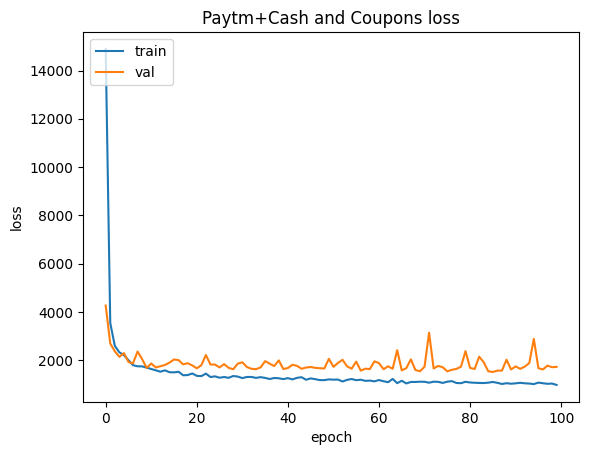

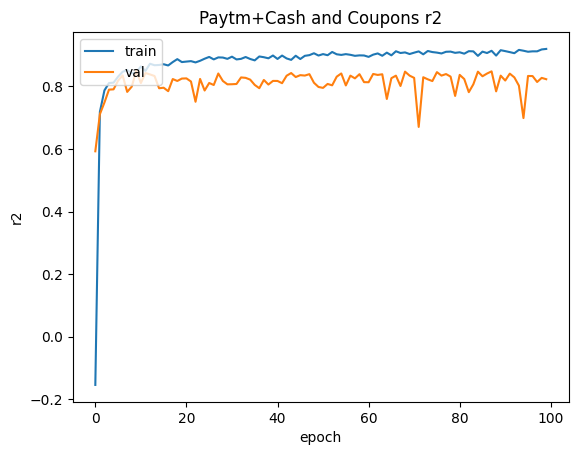

Test RMSE:  43.97667634800127
Train RMSE:  31.160362653274653
Test R2:  0.8531518879768316
Train R2:  0.9200259447097778


In [416]:
# Paytm+Cash and Coupons
y3 = y1.values + y2.values
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.08, random_state=0)

# creating the model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y3_train,
    epochs=E, validation_split = 0.2, verbose=10
)

y3_pred = model.predict(X_test)
y3_pred = y3_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Paytm+Cash and Coupons loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Paytm+Cash and Coupons r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y3_test, y3_pred))
r2 = r2_score(y3_test, y3_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))

print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])

In [417]:
# Running without one-hot encoding
# one-hotencoded file
data = pd.read_csv("../data/all+coupons.csv")
label_encoder = LabelEncoder()

months = []
for i in range(len(data)):
  # X['Date'][i] = X['Date'][i][5:7]
  month = months_dict[int(data['Date'][i][5:7])]
  months.append(month)

for i in range(len(data)):
  # X['Date'][i] = X['Date'][i][5:7]
  w  = days_dict[data['Weekday'][i]]  
  data['Weekday'][i] = w

data['Month'] = pd.Series(months)
# data = data[data['SemType'] != 'Vacation']

data = data.dropna()
data = pd.get_dummies(data, columns=['MealType', 'SemType','Month', 'Weekday'])

data.head()
data = data.reset_index()
# data.info()

# data['MealType_encoded'] = label_encoder.fit_transform(data['MealType'])
# data['SemType_encoded'] = label_encoder.fit_transform(data['SemType'])

X = data
X = X.drop(['Paytm+Cash', 'Coupons', 'Date', 'index'], axis=1)
# X = data[['Weekday','MealType_encoded','SemType_encoded','Holiday','CouponsMand', 'Month']]
y1 = data['Paytm+Cash']
y2 = data['Coupons']

/var/folders/4d/w8t5vd_11zs7s9jlct5ksrfr0000gn/T/ipykernel_26216/2091849337.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weekday'][i] = w


In [418]:
print(X.head())
print(X.info())

# preprocessing
for col in X.columns:
    X[col] = X[col].astype('float64')
    X[col] = X[col]/X[col].max()

print(X.head())

   Holiday  CouponsMand  15_coupon_count  20_coupon_count  25_coupon_count  \
0        0          1.0             28.0             83.0              4.0   
1        0          1.0             28.0             83.0              4.0   
2        0          1.0             28.0             83.0              4.0   
3        1          1.0             61.0             93.0              5.0   
4        1          1.0             61.0             93.0              5.0   

   30_coupon_count  MealType_BreakFast  MealType_Dinner  \
0              0.0                   0                0   
1              0.0                   0                0   
2              0.0                   0                1   
3              0.0                   1                0   
4              0.0                   0                0   

   MealType_EveningSnacks  MealType_Lunch  ...  Month_November  Month_October  \
0                       0               1  ...               0              1   
1             

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 1024)              32768     
                                                                 
 dense_173 (Dense)           (None, 512)               524800    
                                                                 
 dense_174 (Dense)           (None, 128)               65664     
                                                                 
 dense_175 (Dense)           (None, 1)                 129       
                                                                 
Total params: 623,361
Trainable params: 623,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

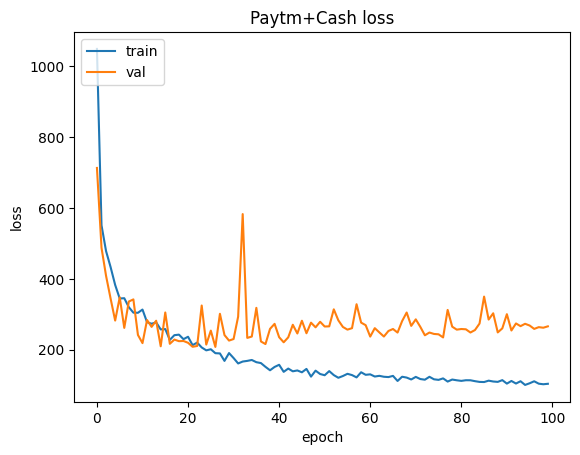

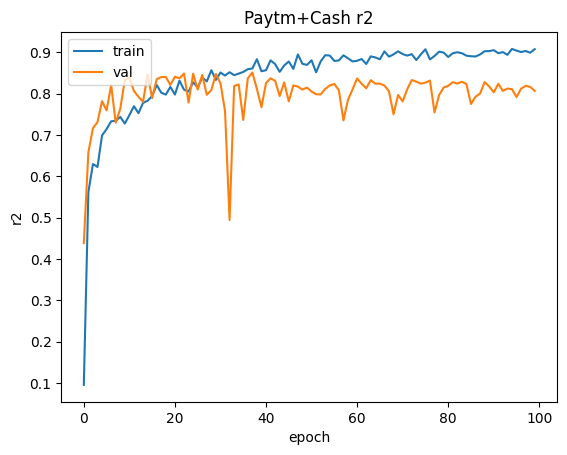

Test RMSE:  15.255938725707182
Train RMSE:  10.193396236939959
Test R2:  0.7754887147388813
Train R2:  0.9077978730201721


In [419]:
# Paytm+Cash
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.08, random_state=0)

# creating model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y1_train,
    epochs=E, validation_split = 0.2, verbose=10
)

y1_pred = model.predict(X_test)
y1_pred = y1_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Paytm+Cash loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Paytm+Cash r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2 = r2_score(y1_test, y1_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))
print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])


Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 1024)              32768     
                                                                 
 dense_177 (Dense)           (None, 512)               524800    
                                                                 
 dense_178 (Dense)           (None, 128)               65664     
                                                                 
 dense_179 (Dense)           (None, 1)                 129       
                                                                 
Total params: 623,361
Trainable params: 623,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

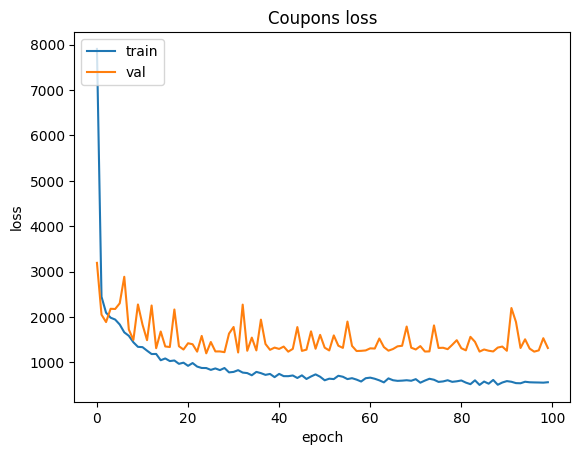

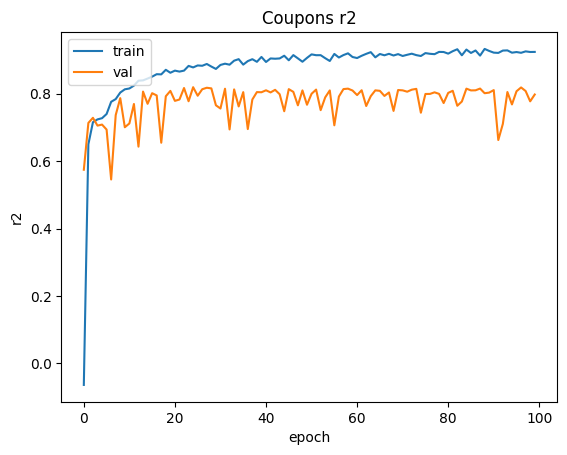

Test RMSE:  36.56208246658484
Train RMSE:  23.685868904099497
Test R2:  0.808022975300975
Train R2:  0.9235645532608032


In [420]:
# Coupons
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.08, random_state=0)

# creating the model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y2_train,
    epochs=E, validation_split = 0.2, verbose=10
)

y2_pred = model.predict(X_test)
y2_pred = y2_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Coupons loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Coupons r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2 = r2_score(y2_test, y2_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))

print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 1024)              32768     
                                                                 
 dense_181 (Dense)           (None, 512)               524800    
                                                                 
 dense_182 (Dense)           (None, 128)               65664     
                                                                 
 dense_183 (Dense)           (None, 1)                 129       
                                                                 
Total params: 623,361
Trainable params: 623,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

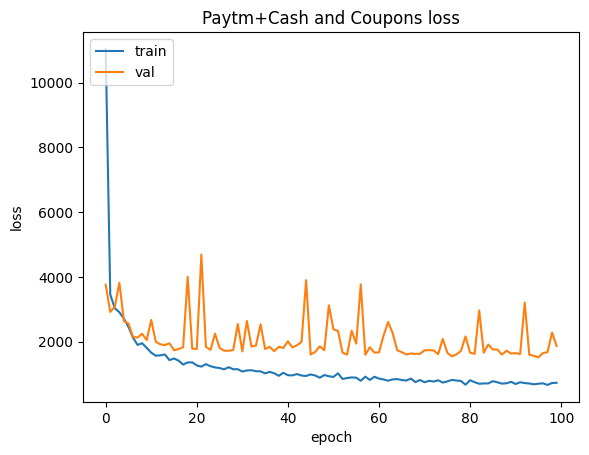

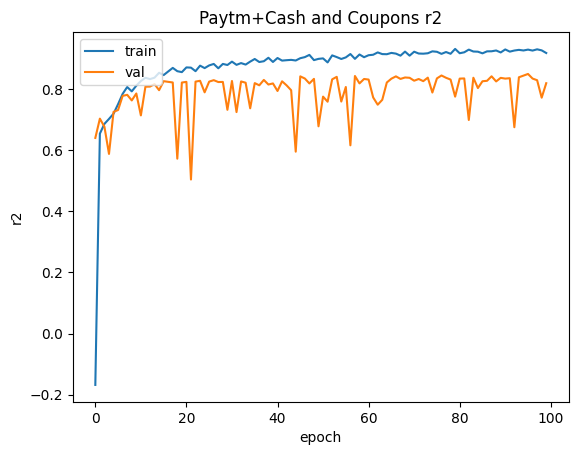

Test RMSE:  42.40416818635956
Train RMSE:  26.960597922376113
Test R2:  0.7811992161783006
Train R2:  0.9173184037208557


In [421]:
# Paytm+Cash and Coupons
y3 = y1.values + y2.values
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.08, random_state=0)

# creating the model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y3_train,
    epochs=E, validation_split = 0.2, verbose=10
)

y3_pred = model.predict(X_test)
y3_pred = y3_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Paytm+Cash and Coupons loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Paytm+Cash and Coupons r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y3_test, y3_pred))
r2 = r2_score(y3_test, y3_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))

print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])

In [422]:
# Running without one-hot encoding, without coupon counts
# one-hotencoded file
data = pd.read_csv("../data/all.csv")
label_encoder = LabelEncoder()

months = []
for i in range(len(data)):
  # X['Date'][i] = X['Date'][i][5:7]
  month = months_dict[int(data['Date'][i][5:7])]
  months.append(month)

for i in range(len(data)):
  # X['Date'][i] = X['Date'][i][5:7]
  w  = days_dict[data['Weekday'][i]]  
  data['Weekday'][i] = w

data['Month'] = pd.Series(months)
# data = data[data['SemType'] != 'Vacation']

data = data.dropna()
data = pd.get_dummies(data, columns=['MealType', 'SemType','Month', 'Weekday'])

data.head()
data = data.reset_index()
# data.info()

# data['MealType_encoded'] = label_encoder.fit_transform(data['MealType'])
# data['SemType_encoded'] = label_encoder.fit_transform(data['SemType'])

X = data
X = X.drop(['Paytm+Cash', 'Coupons', 'Date', 'index'], axis=1)
# X = data[['Weekday','MealType_encoded','SemType_encoded','Holiday','CouponsMand', 'Month']]
y1 = data['Paytm+Cash']
y2 = data['Coupons']

/var/folders/4d/w8t5vd_11zs7s9jlct5ksrfr0000gn/T/ipykernel_26216/4050285288.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weekday'][i] = w


In [423]:
print(X.head())
print(X.info())

# preprocessing
for col in X.columns:
    X[col] = X[col].astype('float64')
    X[col] = X[col]/X[col].max()

print(X.head())

   Holiday  CouponsMand  MealType_BreakFast  MealType_Dinner  \
0        0          0.0                   1                0   
1        0          0.0                   0                0   
2        0          0.0                   0                0   
3        0          0.0                   0                1   
4        0          0.0                   1                0   

   MealType_EveningSnacks  MealType_Lunch  SemType_Acad  SemType_Vacation  \
0                       0               0             1                 0   
1                       0               1             1                 0   
2                       1               0             1                 0   
3                       0               0             1                 0   
4                       0               0             1                 0   

   Month_April  Month_August  ...  Month_November  Month_October  \
0            0             0  ...               0              0   
1            0  

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 1024)              28672     
                                                                 
 dense_185 (Dense)           (None, 512)               524800    
                                                                 
 dense_186 (Dense)           (None, 128)               65664     
                                                                 
 dense_187 (Dense)           (None, 1)                 129       
                                                                 
Total params: 619,265
Trainable params: 619,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

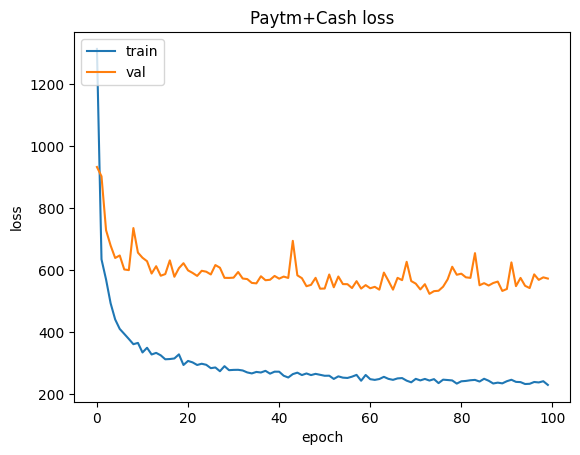

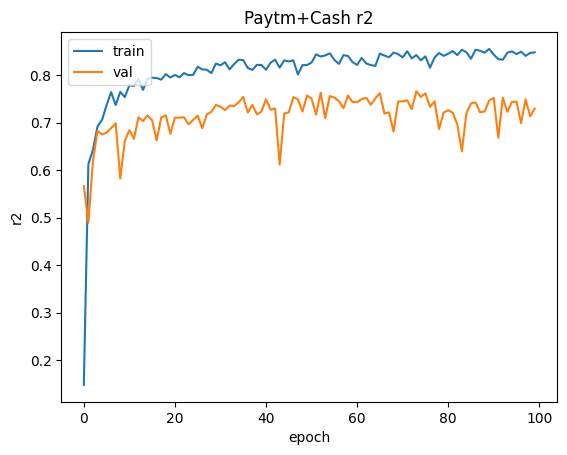

Test RMSE:  19.057528019161335
Train RMSE:  15.123408462397219
Test R2:  0.7597162709974117
Train R2:  0.84816575050354


In [424]:
# Paytm+Cash
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.08, random_state=0)

# creating model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y1_train,
    epochs=E, validation_split = 0.2, verbose=10
)

y1_pred = model.predict(X_test)
y1_pred = y1_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Paytm+Cash loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Paytm+Cash r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2 = r2_score(y1_test, y1_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))
print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])


Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 1024)              28672     
                                                                 
 dense_189 (Dense)           (None, 512)               524800    
                                                                 
 dense_190 (Dense)           (None, 128)               65664     
                                                                 
 dense_191 (Dense)           (None, 1)                 129       
                                                                 
Total params: 619,265
Trainable params: 619,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

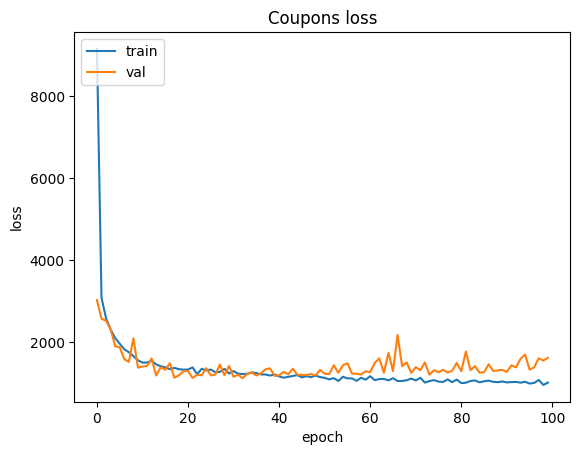

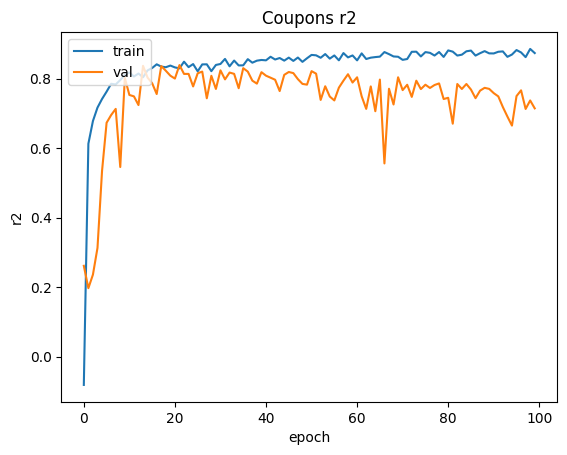

Test RMSE:  38.88735695370619
Train RMSE:  31.68661010214922
Test R2:  0.8320781013447339
Train R2:  0.8732101917266846


In [425]:
# Coupons
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.08, random_state=0)

# creating the model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y2_train,
    epochs=E, validation_split = 0.2, verbose=10
)

y2_pred = model.predict(X_test)
y2_pred = y2_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Coupons loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Coupons r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2 = r2_score(y2_test, y2_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))

print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 1024)              28672     
                                                                 
 dense_193 (Dense)           (None, 512)               524800    
                                                                 
 dense_194 (Dense)           (None, 128)               65664     
                                                                 
 dense_195 (Dense)           (None, 1)                 129       
                                                                 
Total params: 619,265
Trainable params: 619,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 

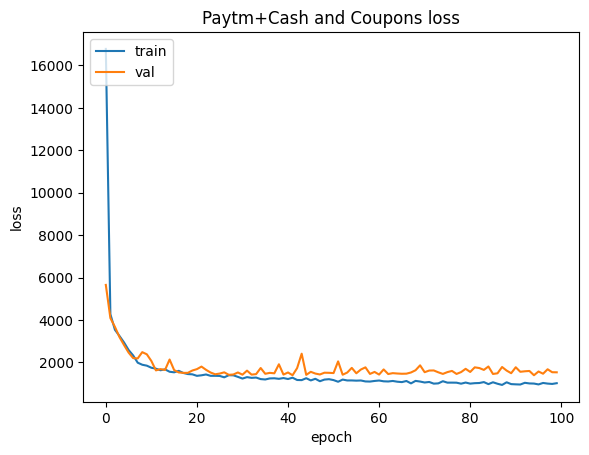

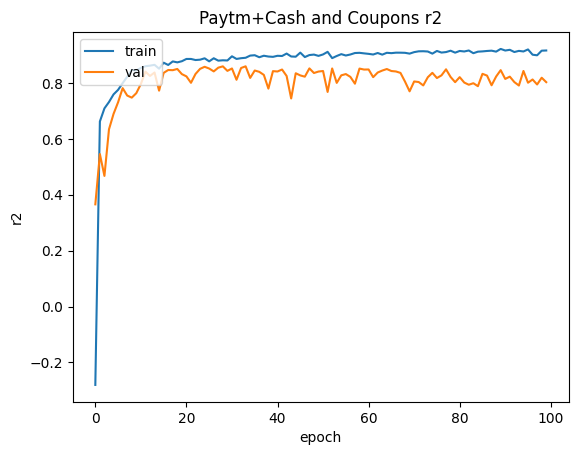

Test RMSE:  42.4860288568785
Train RMSE:  31.934120074026524
Test R2:  0.8629383864695359
Train R2:  0.9159068465232849


In [426]:
# Paytm+Cash and Coupons
y3 = y1.values + y2.values
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.08, random_state=0)

# creating the model

model = keras.Sequential([
    layers.Dense(
        1024, activation='relu', 
        input_shape=[len(X.keys())], 
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.1),
    layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    # layers.Dropout(0.2),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(0.001),
        bias_regularizer=keras.regularizers.l2(0.001)
    ),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', coeff_determination])

model.summary()

# training
E=100

history = model.fit(
    X_train, y3_train,
    epochs=E, validation_split = 0.2, verbose=10
)

y3_pred = model.predict(X_test)
y3_pred = y3_pred.flatten()

# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Paytm+Cash and Coupons loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot train and val r2
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('Paytm+Cash and Coupons r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# test rmse and r2 score
rmse = np.sqrt(mean_squared_error(y3_test, y3_pred))
r2 = r2_score(y3_test, y3_pred)
print("Test RMSE: ", rmse)
print("Train RMSE: ", np.sqrt(history.history['loss'][-1]))

print("Test R2: ", r2)
print("Train R2: ", history.history['coeff_determination'][-1])